In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inserciones

In [82]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
df_dv_id = pd.read_csv("dv_inserciones_id.csv")
df_dv_usr = pd.read_csv("dv_inserciones_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.550209  1.066278  1.621451  2.187813   
1      hashing_cerrado_lineal  0.423616  0.814719  1.257792  1.689725   
2  hashing_cerrado_cuadratico  0.416957  0.785038  1.252567  1.670460   
3       hashing_cerrado_doble  0.412407  0.804427  1.253074  1.713955   
4          std::unordered_map  0.428250  0.798974  1.281231  1.678284   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  2.683575  3.200064  3.877999  4.351944  4.845875  ...  6.058284  6.453581   
1  2.068341  2.490925  3.020547  3.343989  3.737593  ...  4.520636  4.789501   
2  2.068203  2.504284  3.026097  3.291165  3.730726  ...  4.473972  4.777829   
3  2.146717  2.576962  3.098209  3.383398  3.817314  ...  4.591621  4.917968   
4  2.047695  2.620288  3.071312  3.365438  3.744112  ...  4.939561  5.251624   

      13000     14000     15000     16000     17000      18000      19000  \
0  

In [83]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")

df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())


df_id_melted['inserciones'] = df_id_melted['inserciones'].astype(int)
df_usr_melted['inserciones'] = df_usr_melted['inserciones'].astype(int)

                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.550209    0.073345
1      hashing_cerrado_lineal        1000  0.423616    0.053820
2  hashing_cerrado_cuadratico        1000  0.416957    0.055138
3       hashing_cerrado_doble        1000  0.412407    0.055237
4          std::unordered_map        1000  0.428250    0.043786
                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.792167    0.084177
1      hashing_cerrado_lineal        1000  0.638959    0.041412
2  hashing_cerrado_cuadratico        1000  0.653519    0.060961
3       hashing_cerrado_doble        1000  0.841066    0.096239
4          std::unordered_map        1000  0.403550    0.024052


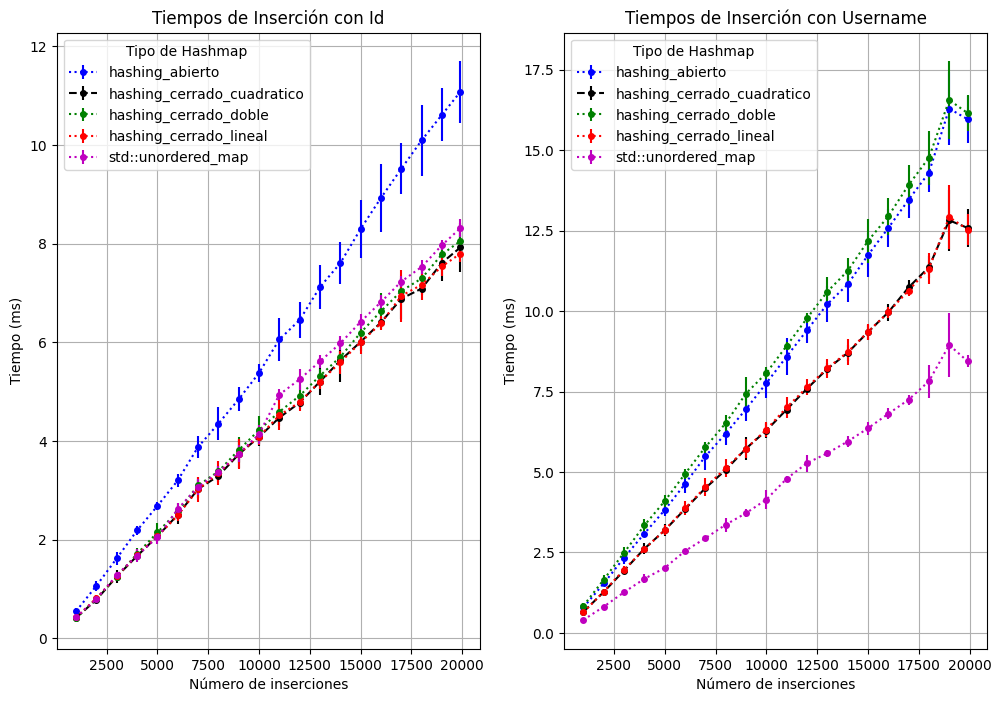

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones")

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.savefig("inserciones.png", bbox_inches="tight")
plt.show()


# Busquedas Tipo 1

In [85]:
df_id = pd.read_csv("busquedas1_id.csv")
df_usr = pd.read_csv("busquedas1_username.csv")
df_dv_id = pd.read_csv("dv_busquedas1_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas1_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa       1000        2000        3000        4000  \
0             hashing_abierto  65.685064  130.487273  194.082876  260.499708   
1      hashing_cerrado_lineal   0.101188    0.173464    0.250631    0.305034   
2  hashing_cerrado_cuadratico   0.095762    0.164077    0.232640    0.310524   
3       hashing_cerrado_doble   0.108151    0.192923    0.286266    0.363073   
4          std::unordered_map   0.386189    0.734084    1.112549    1.454554   

         5000        6000        7000        8000        9000  ...  \
0  324.570487  388.466855  458.500038  524.394921  582.004599  ...   
1    0.441376    0.472508    0.570698    0.602401    0.719426  ...   
2    0.378900    0.467330    0.554207    0.609337    0.692286  ...   
3    0.457412    0.529569    0.617400    0.791428    0.806535  ...   
4    1.644144    2.120324    2.233452    2.736143    3.086667  ...   

        11000       12000       13000       14000       15000        16000  \
0  715.069664  780.7

In [86]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())

df_id_melted["busquedas"] = df_id_melted["busquedas"].astype(int)
df_usr_melted["busquedas"] = df_usr_melted["busquedas"].astype(int)

                         mapa busquedas     tiempo  tiempo_err
0             hashing_abierto      1000  65.685064    2.445927
1      hashing_cerrado_lineal      1000   0.101188    0.022286
2  hashing_cerrado_cuadratico      1000   0.095762    0.015320
3       hashing_cerrado_doble      1000   0.108151    0.015677
4          std::unordered_map      1000   0.386189    0.061578
                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.248712    0.024364
1      hashing_cerrado_lineal      1000  0.240197    0.016230
2  hashing_cerrado_cuadratico      1000  0.238841    0.014893
3       hashing_cerrado_doble      1000  0.418679    0.021204
4          std::unordered_map      1000  0.022037    0.000462


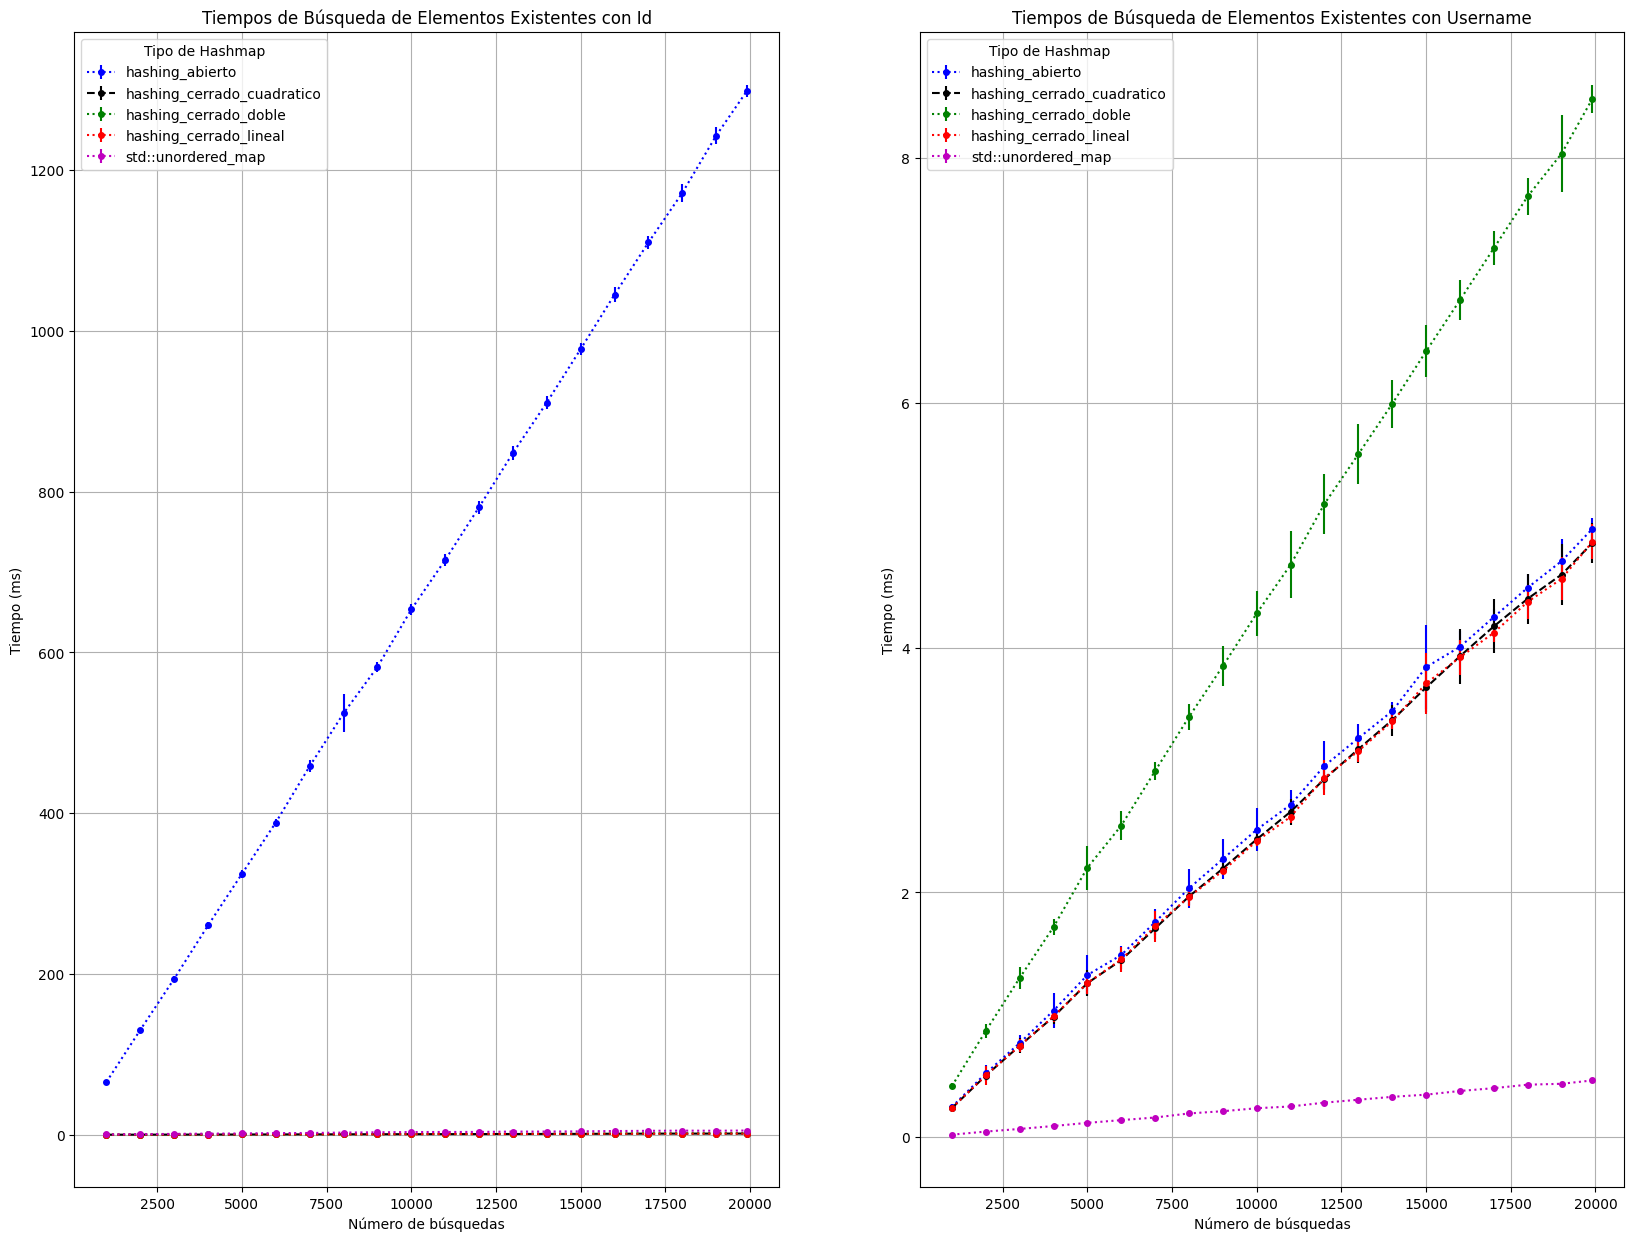

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i],yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos Existentes con Username")

plt.savefig("busquedas_1.png", bbox_inches="tight")
plt.show()

# Busquedas Tipo 2

In [88]:
df_id = pd.read_csv("busquedas2_id.csv")
df_usr = pd.read_csv("busquedas2_username.csv")
df_dv_id = pd.read_csv("dv_busquedas2_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas2_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.098783  0.224552  0.346692  0.492060   
1      hashing_cerrado_lineal  0.083463  0.153375  0.224260  0.305788   
2  hashing_cerrado_cuadratico  0.089182  0.163013  0.221783  0.321672   
3       hashing_cerrado_doble  0.097037  0.188481  0.262674  0.353653   
4          std::unordered_map  0.162479  0.392992  0.581606  0.828206   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  0.634163  0.801021  0.898768  1.105119  1.422056  ...  1.513855  1.699745   
1  0.387875  0.470683  0.517178  0.616791  0.650107  ...  0.829242  0.899379   
2  0.394736  0.462615  0.523367  0.602888  0.638399  ...  0.809153  0.880768   
3  0.462016  0.522648  0.613656  0.696808  0.754009  ...  0.928810  1.033294   
4  1.057512  1.322403  1.591201  1.754043  2.055732  ...  2.447012  2.738975   

      13000     14000     15000     16000     17000     18000     19000  \
0  1.

In [89]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())

df_id_melted["busquedas"] = df_id_melted["busquedas"].astype(int)
df_usr_melted["busquedas"] = df_usr_melted["busquedas"].astype(int)

                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.098783    0.023496
1      hashing_cerrado_lineal      1000  0.083463    0.015363
2  hashing_cerrado_cuadratico      1000  0.089182    0.018772
3       hashing_cerrado_doble      1000  0.097037    0.018544
4          std::unordered_map      1000  0.162479    0.023620
                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.294588    0.038678
1      hashing_cerrado_lineal      1000  0.250898    0.020788
2  hashing_cerrado_cuadratico      1000  0.257742    0.028974
3       hashing_cerrado_doble      1000  0.445392    0.042485
4          std::unordered_map      1000  0.174398    0.091799


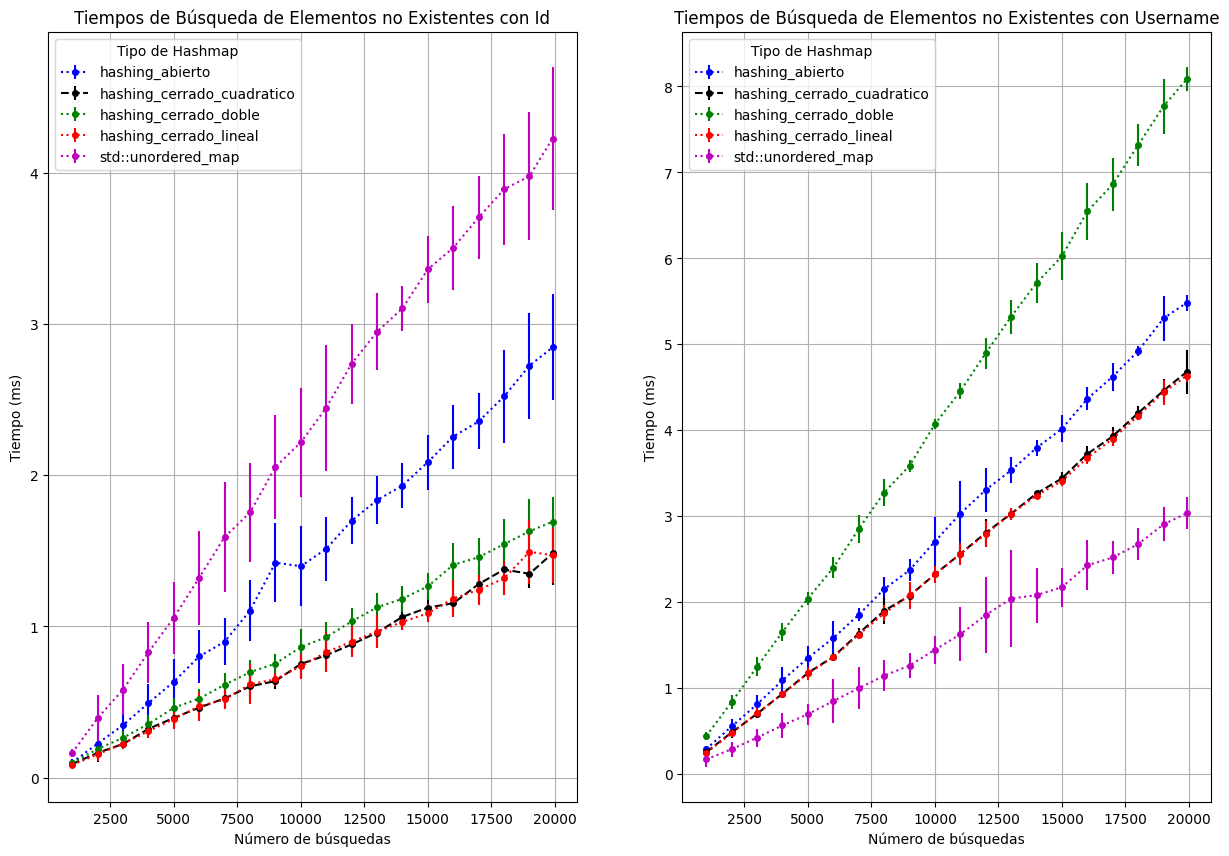

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))


styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1
    
for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos no Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos no Existentes con Username")

plt.savefig("busquedas_2.png", bbox_inches="tight")
plt.show()